In [1]:
import torch
import numpy as np
from torch import nn, optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
def show_data(sample):
  plt.imshow(sample.numpy().reshape(28, 28), cmap='gray')
  plt.show()

In [3]:
train_set = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor());
cv_set = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor());
train_batch_size = 10
cv_batch_size = 5000
train_loader = torch.utils.data.DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
cv_loader = torch.utils.data.DataLoader(cv_set, batch_size=cv_batch_size, shuffle=False)

In [4]:
class Net(nn.Module):
  def __init__(self,input_size, l1, l2, output_size):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(input_size, l1)
    self.linear2 = nn.Linear(l1, l2)
    self.linear3 = nn.Linear(l2, output_size)

  def forward(self, x):
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = torch.softmax(x, dim = 1)
    return x

In [5]:
model = Net(28*28, 128, 64, 10)


In [6]:
train_loss_list = []
cv_loss_list = []
epochs = 12
def trainer(epochs, lr):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr = lr)
  for epoch in range(epochs):

    total_train_loss = 0
    for x, y in train_loader:
      optimizer.zero_grad()
      z = model(x.view(-1, 28*28))
      train_loss = criterion(z, y)
      total_train_loss += train_loss
      train_loss.backward()
      optimizer.step()
    avg_train_loss = total_train_loss.item()/(len(train_set)/train_batch_size)
    train_loss_list.append(avg_train_loss)

    correct = 0
    total_cv_loss = 0
    for x_cv, y_cv in cv_loader:
      z_cv = model(x_cv.view(-1, 28*28))
      _, idx = torch.max(z_cv, dim=1)
      correct += (idx==y_cv).sum().item()
      cv_loss = criterion(z_cv, y_cv)
      total_cv_loss += cv_loss
    avg_cv_loss = total_cv_loss.item()/(len(cv_set)/cv_batch_size)
    cv_loss_list.append(avg_cv_loss)
    acc=correct/len(cv_set)
    print('Epoch= ',epoch,'------ average train loss=', avg_train_loss, '------ average cv loss=', avg_cv_loss,'------ acc= ',100*acc,' %')

In [7]:
trainer(epochs=epochs, lr=0.01)

Epoch=  0 ------ average train loss= 1.98534765625 ------ average cv loss= 1.6761343479156494 ------ acc=  81.91000000000001  %
Epoch=  1 ------ average train loss= 1.65361669921875 ------ average cv loss= 1.6291911602020264 ------ acc=  84.2  %
Epoch=  2 ------ average train loss= 1.5875631510416666 ------ average cv loss= 1.568055272102356 ------ acc=  90.34  %
Epoch=  3 ------ average train loss= 1.5658694661458334 ------ average cv loss= 1.5569047927856445 ------ acc=  91.19  %
Epoch=  4 ------ average train loss= 1.5576857096354166 ------ average cv loss= 1.552255630493164 ------ acc=  91.4  %
Epoch=  5 ------ average train loss= 1.5525867513020832 ------ average cv loss= 1.5475811958312988 ------ acc=  91.89  %
Epoch=  6 ------ average train loss= 1.5488751627604167 ------ average cv loss= 1.5451010465621948 ------ acc=  92.04  %
Epoch=  7 ------ average train loss= 1.5457571614583334 ------ average cv loss= 1.5427542924880981 ------ acc=  92.2  %
Epoch=  8 ------ average train l

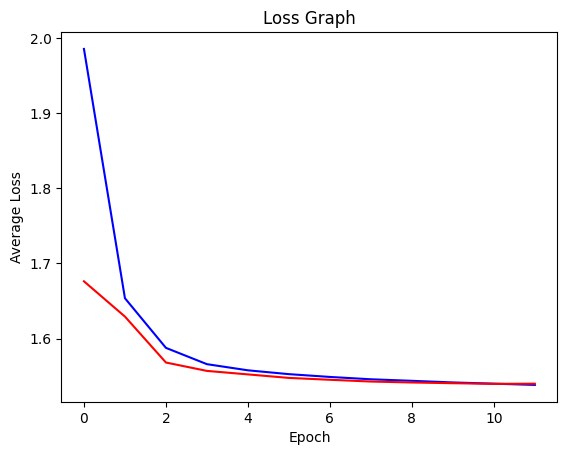

In [10]:
iteration = np.array([i for i in range(epochs)])
plt.plot(iteration, train_loss_list, color='blue', label='Train')
plt.plot(iteration, cv_loss_list, color='red', label='Validation')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()